Machine learning classification aims at categorizing data points into distinct classes based on their features. Perceptron neural networks and random forest classifiers are two popular approaches for this task.

**Logistic regression** is a statistical model used for binary classification. It estimates the probability that a given input belongs to a certain class using a logistic function.

**Stochastic gradient descent** is commonly used to train machine learning models like  perceptron neural networks and logistic regression. It iteratively updates the parameters of the model by computing the gradient of the loss function on a small subset of the training data (a mini-batch) and adjusting the parameters in the opposite direction of the gradient to minimize the loss.

**Random forest** classifiers are ensemble learning methods that combine multiple decision trees to improve classification accuracy. Each tree is trained on a random subset of the data and features, and the final classification is determined by a majority vote or averaging of the individual tree predictions.

In this example we will use red, green, and blue pixels to classify green canopy cover.
Data was collected using the [pixlabel app](https://andres-patrignani.github.io/pixlabel)

In [1]:
# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier


## Read dataset of RGB data and labels

In [2]:
# Read training dataset
df = pd.read_csv('../datasets/pixlabel.csv')
df.head(3)


,RECORD,FILENAME,LABEL,COL,ROW,TOTALCOLS,TOTALROWS,TIMESTAMP,R1,G1,B1
0,1,example.jpg,canopy,858,208,917,687,2024-03-29T04:59:28.723Z,237,2,2
1,2,example.jpg,canopy,874,223,917,687,2024-03-29T04:59:36.440Z,110,159,129
2,3,example.jpg,canopy,777,213,917,687,2024-03-29T04:59:41.010Z,135,184,145


In [3]:
# Create index for each label
idx_canopy = df['LABEL'] == 'canopy'
idx_background = df['LABEL'] == 'background'


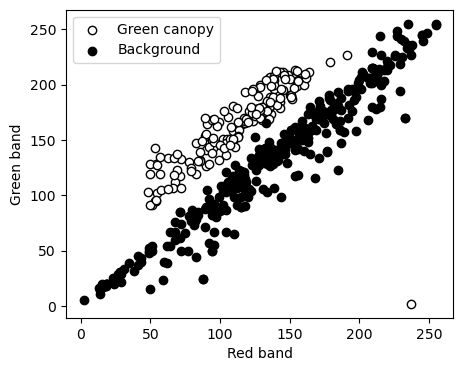

In [4]:
# Create figure to inspect data
plt.figure(figsize=(5,4))
plt.scatter(df.loc[idx_canopy,'R1'], df.loc[idx_canopy,'G1'],
            facecolor='w', edgecolor='k', label='Green canopy')
plt.scatter(df.loc[idx_background,'R1'], df.loc[idx_background,'G1'],
            facecolor='k', edgecolor='k',label='Background')
plt.xlabel('Red band')
plt.ylabel('Green band')
plt.legend()
plt.show()


## Load image to classify

In [5]:
# Read image
RGB = plt.imread('../datasets/images/grassland.jpg')
R = RGB[:,:,0]
G = RGB[:,:,1]
B = RGB[:,:,2]

X_img = np.column_stack( (R.flatten(), G.flatten(), B.flatten()) )


In [6]:
# Create function to cmpute green canopy cover
compute_gcc = lambda I: round(np.sum(I)/I.size*100,1)


## Define inputs and outputs

In [7]:
# Gather inputs in float data type
X = df[['R1','G1','B1']].values/255

# Define output as a binary response
y,unique_labels = df['LABEL'].factorize(sort=True)


## Train Logistic Regression

In [8]:
# Fit Logitsitc Regression model
LR = LogisticRegression(random_state=0).fit(X, y)

# Compute mean accuracy on the training dataset
LR.score(X, y)


0.902

In [9]:
# Classifiy image
BW_LR = LR.predict(X_img)
BW_LR = np.reshape(BW_LR, R.shape)


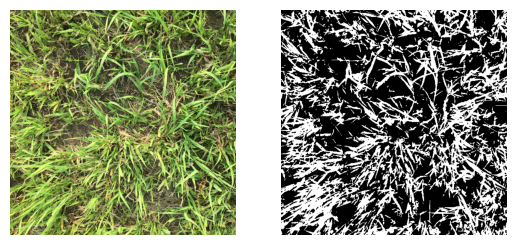

In [10]:
# Create figure of classified image using Logisitc Regression
plt.figure()
plt.subplot(1,2,1)
plt.imshow(RGB)
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(BW_LR, cmap='binary_r')
plt.axis('off')

plt.show()

In [32]:
# Compute percent green canopy cover
print('Canopy cover using Logistic Regression:', compute_gcc(BW_LR), '%')


Canopy cover using Logistic Regression: 37.7 %


## Train Stochastic Gradient Descent classifier


In [13]:
SGD = SGDClassifier(loss="hinge", alpha=0.0001, max_iter=200)

SGD.fit(X, y)

SGDClassifier(max_iter=200)

In [14]:
# Classifiy image
BW_SGD = SGD.predict(X_img)
BW_SGD = np.reshape(BW_SGD, R.shape)


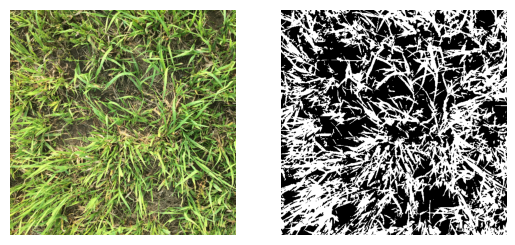

In [15]:
# Create figure of classified image using Logisitc Regression
plt.figure()
plt.subplot(1,2,1)
plt.imshow(RGB)
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(BW_SGD, cmap='binary_r')
plt.axis('off')

plt.show()

In [31]:
# Compute percent green canopy cover
print('Canopy cover using Stochastic Gradient Descent:', compute_gcc(BW_SGD), '%')


Canopy cover using Stochastic Gradient Descent: 45.6 %


## Train Random Forest classifier

In [25]:
# Define Random Forest model
RF = RandomForestClassifier(n_estimators=20).fit(X, y)
RF.score(X,y)


1.0

In [22]:
# Classifiy image
BW_RF = RF.predict(X_img)
BW_RF = np.reshape(BW_RF, R.shape)


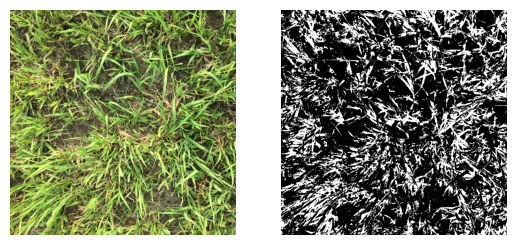

In [23]:
plt.figure()
plt.subplot(1,2,1)
plt.imshow(RGB)
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(BW_RF, cmap='binary_r')
plt.axis('off')

plt.show()

In [29]:
# Compute green canopy cover
print('Canopy cover using Random Forest:', compute_gcc(BW_RF), '%')


Canopy cover using Random Forest: 30.8 %
